In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.spatial.transform import Rotation as R
import file_path
import csv

In [14]:
def plotPose(X, Y, Z, oriX, oriY, oriZ):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X, Y, Z, cmap='jet', marker='.', alpha=1)

    #max_axis_range = max(np.max(X) - np.min(X), np.max(Y) - np.min(Y), np.max(Z) - np.min(Z))
    i = 0
    a = max_axis_range / 20
    for i in range(0, X.shape[0], 100):
        ax.plot([X[i], X[i] + a * oriX[i, 0]], [Y[i], Y[i] + a * oriX[i, 1]], [Z[i], Z[i] + a * oriX[i, 2]], color='r',
                linestyle='-', linewidth=2)
        ax.plot([X[i], X[i] + a * oriY[i, 0]], [Y[i], Y[i] + a * oriY[i, 1]], [Z[i], Z[i] + a * oriY[i, 2]], color='g',
                linestyle='-', linewidth=2)
        ax.plot([X[i], X[i] + a * oriZ[i, 0]], [Y[i], Y[i] + a * oriZ[i, 1]], [Z[i], Z[i] + a * oriZ[i, 2]], color='b',
                linestyle='-', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # ax.set_zlim3d([-10, 10])
    ax.auto_scale_xyz([np.min(X), np.min(X) + max_axis_range], [np.min(Y), np.min(Y) + max_axis_range],
                      [np.min(Z), np.min(Z) + max_axis_range])

    plt.show()




In [27]:
path_prefix = '/home/bru/Dev/DATA/scn2_take01/take01/'
file_name = 'evo_gt.txt'
full_path = file_path.file_path(path_prefix, file_name)

with open('/home/bru/Dev/DATA/scn2_take01/take01/evo_gt.txt', encoding="Latin-1") as csvfile:  #change this according to your file 
    reader = list(csv.reader(csvfile, delimiter=" "))
    
reader = np.array((reader))
reader = reader.astype(float)
reader = reader.astype(int)
start_t = 0
stop_t = reader[-1, 0]
# T_lidar_1 = np.array([-0.0078031, 0.817209, 0.541196, 0.917704,
#                       -0.117454, -0.572388, 0.727834, 0.48356,
#                       0.904633, -0.0673863, 0.100153, -0.665694,
#                       0, 0, 0, 1]).reshape((4, 4))
T_lidar_0 = np.array([-0.3819, -0.357824, 0.852124, 0.614092, 
                      -0.847004, -0.233392, -0.477611, -0.322554,
                      0.36978, -0.904152, -0.213946, -0.0494612,
                      0, 0, 0, 1]).reshape((4, 4))
euler_center_baumer = np.array([-89.90413419510571,
                                -0.24585344685304605,
                                -64.33530496116742])
t_center_baumer = np.array([1.4970588815871406,
                            0.4157759017823685,
                            1.2825050304352636])
R_center_baumer = R.from_euler('xyz', euler_center_baumer).as_matrix()

T_center_baumer = np.eye(4)
T_center_baumer[:3, :3] = R_center_baumer
T_center_baumer[:3, 3] = t_center_baumer

T_lidar_baumer = np.array([0.06527, -0.344349, 0.93657, 0.947059,
                           -0.967731, -0.250765, -0.0247573, 0.415776,
                           0.243384, -0.904732, -0.349605, -0.452495,
                           0, 0, 0, 1]).reshape((4, 4))

T_baumer_1 = np.array([0.9101440571262656, -0.05112656051741041, 0.41112512704455406, -0.216258895905397,
                       0.04647405104554883, 0.9986921401911144, 0.021311304509745152, -0.05954830294291894,
                       -0.41167700671419194, -0.00028970700877638776, 0.9113297746769236, 0.024422175420170375,
                       0, 0, 0, 1]).reshape((4,4))

T_baumer_1[:3, :3] = np.eye(3)
rotvec = R.from_matrix(T_lidar_baumer[:3, :3]).as_rotvec()
T_hand_eye = np.identity(4) 

print(T_center_baumer.astype(np.float64))
print(T_hand_eye.astype(np.float64))

pos_time = reader[:, 0]
print(pos_time)
pos = reader[:, 1:4]
ori = reader[:, 4:]

start_id = np.searchsorted(pos_time, start_t)
stop_id = np.searchsorted(pos_time, stop_t)

start_id = 1
stop_id = 60
stop_id = pos_time.shape[0]

X = reader[start_id:stop_id, 0]
Y = reader[start_id:stop_id, 1]
Z = reader[start_id:stop_id, 2]
print(X)
t = pos_time[start_id: stop_id]

ori_section = ori[start_id:stop_id, :]
print(ori_section.shape)
unitX = np.array([1, 0, 0])
unitY = np.array([0, 1, 0])
unitZ = np.array([0, 0, 1])

rotation_matrices = (R.from_quat(ori_section)).as_matrix()
transformation_matrices = np.zeros((rotation_matrices.shape[0], 4, 4))
for j in range(rotation_matrices.shape[0]):
    rotation_matrices[j, :, :] = rotation_matrices[j, :, :] @ T_hand_eye[:3, :3]

oriX = rotation_matrices[:, :, 0]
oriY = rotation_matrices[:, :, 1]
oriZ = rotation_matrices[:, :, 2]


[[ 0.06527003 -0.34434943  0.93656996  1.49705888]
 [-0.96773135 -0.25076507 -0.02475732  0.4157759 ]
 [ 0.2433842  -0.9047322  -0.34960518  1.28250503]
 [ 0.          0.          0.          1.        ]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[   0    1    2 ... 2296 2297 2298]
[   1    2    3 ... 2296 2297 2298]
(2298, 4)


ValueError: Found zero norm quaternions in `quat`.

/tmp/ipykernel_5569/3700034240.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


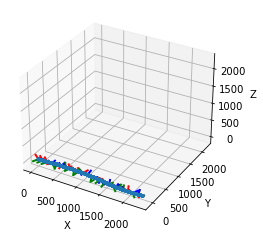

In [28]:
plotPose(X, Y, Z, oriX, oriY, oriZ)
